#NLP. Библиотека Gensim

#### Материал для вдохновления:
#### 1. Вебинар демо-занятие курса «Machine Learning Professional» (Youtube OTUS Онлайн - образование)
#### 2. Публикация 'NLP Tutorial for Text Classification in Python' (Medium.com)
#### 3. Публикация 'Чудесный мир Word Embeddings: какие они бывают и зачем нужны?' (Хабр)

In [1]:
%%capture
%%bash
pip install --upgrade gensim

In [2]:
import pandas as pd
import numpy as np
import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim.models import Word2Vec

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
dict_first_letter = {
    'a':1,
    'b':0,
    'c':1,
    'd':0,
    'e':1,
    'f':0,
    'g':1,
    'h':0,
    'i':1,
    'j':0,
    'k':1,
    'l':0,
    'm':1,
    'n':0,
    'o':1,
    'p':0,
    'q':1,
    'r':0,
    's':1,
    't':0,
    'u':1,
    'v':0,
    'w':1,
    'x':0,
    'y':1,
    'z':0
}

In [4]:
list_texts = []
list_senses = []

In [5]:
n_texts = 50000

In [6]:
for _ in tqdm(range(n_texts)):
  threshold_sense = 0.55
  len_current_text = 50
  list_current_words = []
  count_positive = 0
  count_negative = 0

  for _ in range(len_current_text):
    index_current_letter = random.randint(0,25)
    current_letter = list(dict_first_letter.keys())[index_current_letter]

    if dict_first_letter.get(current_letter) == 1:
      count_positive = count_positive + 1
    else:
      count_negative = count_negative + 1

    list_current_words.append(current_letter*3)

  if count_positive >= round(len_current_text * threshold_sense, 0):
    current_val_sense = 'positive'
  elif count_negative >= round(len_current_text * threshold_sense, 0):
    current_val_sense = 'negative'
  else:
    current_val_sense = 'neutral'

  list_texts.append(' '.join(list_current_words))
  list_senses.append(current_val_sense)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [7]:
dict_texts = {'text':list_texts,'sense':list_senses}

In [8]:
df = pd.DataFrame(data=dict_texts)

In [9]:
df.head()

,text,sense
0,ggg eee vvv www fff ccc ggg sss jjj vvv yyy uu...,neutral
1,ooo uuu sss ggg ppp jjj xxx iii kkk jjj ooo xx...,positive
2,ppp iii kkk ttt kkk qqq vvv xxx lll eee ppp dd...,positive
3,ttt mmm nnn zzz jjj vvv nnn ppp vvv jjj fff mm...,negative
4,mmm bbb www ggg ppp bbb sss ttt uuu mmm www gg...,positive


In [10]:
df['sense'].value_counts()

neutral     26033
negative    12051
positive    11916
Name: sense, dtype: int64

In [11]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

In [12]:
print(texts[0])

['ggg', 'eee', 'vvv', 'www', 'fff', 'ccc', 'ggg', 'sss', 'jjj', 'vvv', 'yyy', 'uuu', 'lll', 'ccc', 'lll', 'mmm', 'ooo', 'fff', 'ccc', 'jjj', 'nnn', 'rrr', 'ccc', 'xxx', 'mmm', 'www', 'ttt', 'fff', 'nnn', 'kkk', 'sss', 'yyy', 'vvv', 'bbb', 'zzz', 'ccc', 'ggg', 'xxx', 'hhh', 'fff', 'qqq', 'ccc', 'rrr', 'nnn', 'hhh', 'fff', 'sss', 'ddd', 'mmm', 'zzz']


In [13]:
%%time
model = Word2Vec(texts, vector_size=50, window=5, min_count=5, workers=4)
model.save('word2v.model')

CPU times: user 9.83 s, sys: 137 ms, total: 9.97 s
Wall time: 9.97 s


In [14]:
model.wv.most_similar('aaa')

[('eee', 0.8588007688522339),
 ('ccc', 0.856658399105072),
 ('hhh', 0.8375251889228821),
 ('rrr', 0.8371411561965942),
 ('ggg', 0.8131603002548218),
 ('ooo', 0.8034253120422363),
 ('mmm', 0.7830168008804321),
 ('ttt', 0.7790563702583313),
 ('qqq', 0.7715994715690613),
 ('xxx', 0.7686998844146729)]

In [15]:
model.wv.most_similar('bbb')

[('ddd', 0.8556894063949585),
 ('jjj', 0.7476959228515625),
 ('nnn', 0.7410858869552612),
 ('zzz', 0.7338865995407104),
 ('ccc', 0.7320193648338318),
 ('qqq', 0.7107437252998352),
 ('ooo', 0.663598358631134),
 ('iii', 0.6629579663276672),
 ('www', 0.6340117454528809),
 ('hhh', 0.6142042875289917)]

In [16]:
# Код графика взят из интернет-публикации 'ОБУЧЕНИЕ NLP-МОДЕЛИ WORD2VEС НА РУССКИХ ТЕКСТАХ С PYTHON'

def tsne_scatterplot(model, word, list_names):

    vectors_words = [model.wv.word_vec(word)]
    word_labels = [word]
    color_list = ['red']

    close_words = model.wv.most_similar(word)
    for wrd_score in close_words:
        wrd_vector = model.wv.word_vec(wrd_score[0])
        vectors_words.append(wrd_vector)
        word_labels.append(wrd_score[0])
        color_list.append('blue')

    for wrd in list_names:
        wrd_vector = model.wv.word_vec(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('green')

    Y = (TSNE(n_components=2, random_state=0, perplexity=15, init="pca")
        .fit_transform(vectors_words))

    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )

    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                " " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
        ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

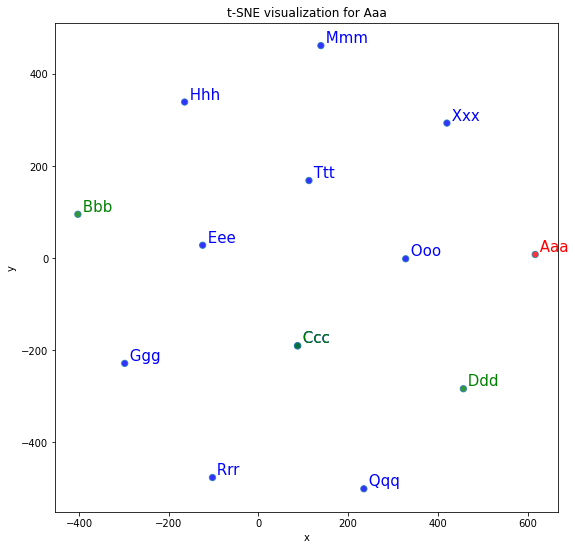

In [17]:
tsne_scatterplot(model, "aaa", ["bbb", "ccc", "ddd"])

In [18]:
X = df.text.tolist()
y = df.sense.tolist()

X,y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                     shuffle=True)
print(f'len train df {len(y_train)}')
print(f'len test df {len(y_test)}')

len train df 35000
len test df 15000


In [19]:
class MeanEmbeddingVectorizer(object):
  def __init__(self, word2vec):
    self.word2vec = word2vec
    self.dim = len(next(iter(word2vec.values())))

  def fit(self, X, y):
    return self

  def transform(self, X):
    return np.array([
                     np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                             or [np.zeros(self.dim)], axis=0) 
                     for words in X
                     ])

In [20]:
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors)) 

In [21]:
X_train_w2v = MeanEmbeddingVectorizer(w2v).fit(X_train,y_train).transform(X_train)
X_test_w2v = MeanEmbeddingVectorizer(w2v).fit(X_test,y_test).transform(X_test)

In [22]:
rfc_w2v = RandomForestClassifier(n_estimators=100)

In [23]:
rfc_w2v.fit(X_train_w2v,y_train)
pred = rfc_w2v.predict(X_test_w2v)

In [24]:
print('Precision: {0:6.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Recall: {0:6.2f}'.format(recall_score(y_test, pred, average='macro')))
print('F1-measure: {0:6.2f}'.format(f1_score(y_test, pred, average='macro')))
print('Accuracy: {0:6.2f}'.format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))

Precision:   0.17
Recall:   0.33
F1-measure:   0.23
Accuracy:   0.52
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      3642
     neutral       0.52      1.00      0.68      7805
    positive       0.00      0.00      0.00      3553

    accuracy                           0.52     15000
   macro avg       0.17      0.33      0.23     15000
weighted avg       0.27      0.52      0.36     15000

